In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

seed = 42
np.random.seed(seed)

In [2]:
class Simulation:
    def __init__(self, id):
        # start simulation
        self.id = id
        


def make_agent_graph(input_graph):
    G = nx.Graph()
    # bx_node = {u:d for u,d in bt.nodes(data=True)}
    bx_node = [(u, d) for (u,d) in input_graph.nodes(data=True)]
    # print(bx_node)
    mt = defaultdict() #mapping table
    for item in bx_node:
        node_id = item[0]
        if 'alpha' in item[1]:
            node_alpha = item[1]['alpha']
            node_beta  = item[1]['beta']
            node = Agent(node_id, alpha= node_alpha, beta = node_beta)
        node = Agent(node_id)
        mt[node_id] = node
        node.compute_mode()
        G.add_node(node)

    bx_edge = [(mt[u], mt[v], d) for (u,v,d) in input_graph.edges(data=True)]
    G.add_edges_from(bx_edge)
    return G

In [3]:
from scipy.stats import beta

class Agent:
    def __init__(self, id, alpha=2, beta=2):
        self.id = id
        self.alpha = alpha
        self.beta = beta
    
    def __str__(self):
        return "<id: %s, alpha: %s, beta: %s>" % (self.id, self.alpha, self.beta)
#         return str(self.id)
    
    def __repr__(self):
        return "<id: %s, alpha: %s, beta: %s>" % (self.id, self.alpha, self.beta)
#         return str(self.id)
        
    def compute_mode(self):
        mode = (self.alpha - 1) / (self.alpha + self.beta - 2)
#         print(mode)
        return mode

In [4]:
def draw_network(G):
    #TODO: transparency based on distribution variance
    labels = {u:u.id for u in G.nodes()}
    modes = [u.compute_mode() for (u,d) in G.nodes(data=True)]
    
    print(modes)
    fig, ax = plt.subplots()
    ax.axis('off')
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=400, alpha=0.8,
                           node_color=modes, cmap=plt.cm.cool)


    nx.draw_networkx_edges(G, pos, edge_color='w')
    nx.draw_networkx_labels(G,pos,labels,font_size=14)
    plt.show()


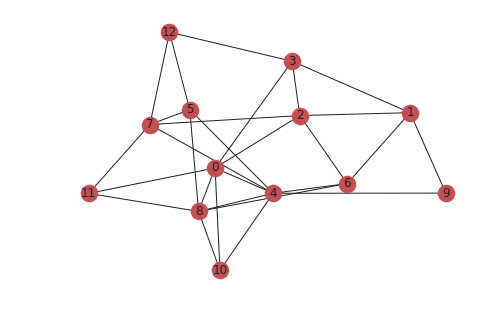

In [5]:
bx = nx.binomial_graph(n=13, p=0.3, seed=42)
nx.draw(bx, with_labels=True)
plt.show()

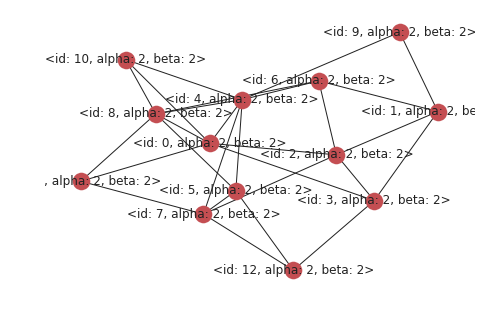

In [6]:
G = make_agent_graph(bx)
nx.draw(G, with_labels=True)

In [7]:
nodes = [u for (u,d) in G.nodes(data=True)]
print(nodes)


[<id: 0, alpha: 2, beta: 2>, <id: 1, alpha: 2, beta: 2>, <id: 2, alpha: 2, beta: 2>, <id: 3, alpha: 2, beta: 2>, <id: 4, alpha: 2, beta: 2>, <id: 5, alpha: 2, beta: 2>, <id: 6, alpha: 2, beta: 2>, <id: 7, alpha: 2, beta: 2>, <id: 8, alpha: 2, beta: 2>, <id: 9, alpha: 2, beta: 2>, <id: 10, alpha: 2, beta: 2>, <id: 11, alpha: 2, beta: 2>, <id: 12, alpha: 2, beta: 2>]


In [8]:
# We effectively want to make the entire graph directional at any iteration

# Random initialization, who begins the conversation is random
nodes_order = np.random.permutation(nodes)
print(nodes_order)

# Select at random an edge of each node and connect it
first_node = nodes_order[0]
print(first_node)

first_edge = [i for i in G.neighbors(first_node)]
print(first_edge)

second_node = np.random.choice(first_edge)
print(second_node)

# Something happens here, so the first_node communicates to the second_node
# The nature of the message is determined by the beta
if first_node.compute_mode() < np.random.rand(1):
    second_node.alpha += 1
else:
    
    second_node.beta += 1

print(second_node)


[<id: 2, alpha: 2, beta: 2> <id: 12, alpha: 2, beta: 2>
 <id: 8, alpha: 2, beta: 2> <id: 11, alpha: 2, beta: 2>
 <id: 4, alpha: 2, beta: 2> <id: 5, alpha: 2, beta: 2>
 <id: 0, alpha: 2, beta: 2> <id: 10, alpha: 2, beta: 2>
 <id: 6, alpha: 2, beta: 2> <id: 7, alpha: 2, beta: 2>
 <id: 3, alpha: 2, beta: 2> <id: 9, alpha: 2, beta: 2>
 <id: 1, alpha: 2, beta: 2>]
<id: 2, alpha: 2, beta: 2>
[<id: 0, alpha: 2, beta: 2>, <id: 1, alpha: 2, beta: 2>, <id: 3, alpha: 2, beta: 2>, <id: 6, alpha: 2, beta: 2>, <id: 7, alpha: 2, beta: 2>]
<id: 7, alpha: 2, beta: 2>
<id: 7, alpha: 3, beta: 2>


In [9]:
nodes = [u for (u,d) in G.nodes(data=True)]
# We effectively want to make the entire graph directional at any iteration
# Random initialization, who begins the conversation is random
nodes_order = np.random.permutation(nodes)
print(nodes_order)

for sender in nodes_order:
    sender_edges = [i for i in G.neighbors(sender)]
    receiver = np.random.choice(sender_edges)
    if sender.compute_mode() < np.random.rand(1):
        receiver.alpha += 1
    else:
        receiver.beta += 1
# All nodes talk now

[<id: 1, alpha: 2, beta: 2> <id: 5, alpha: 2, beta: 2>
 <id: 2, alpha: 2, beta: 2> <id: 4, alpha: 2, beta: 2>
 <id: 3, alpha: 2, beta: 2> <id: 7, alpha: 3, beta: 2>
 <id: 9, alpha: 2, beta: 2> <id: 6, alpha: 2, beta: 2>
 <id: 10, alpha: 2, beta: 2> <id: 0, alpha: 2, beta: 2>
 <id: 12, alpha: 2, beta: 2> <id: 11, alpha: 2, beta: 2>
 <id: 8, alpha: 2, beta: 2>]


In [10]:
for u in G.nodes(data=True):
    print(u)

(<id: 0, alpha: 3, beta: 2>, {})
(<id: 1, alpha: 2, beta: 2>, {})
(<id: 2, alpha: 2, beta: 3>, {})
(<id: 3, alpha: 2, beta: 4>, {})
(<id: 4, alpha: 2, beta: 3>, {})
(<id: 5, alpha: 2, beta: 2>, {})
(<id: 6, alpha: 3, beta: 2>, {})
(<id: 7, alpha: 3, beta: 2>, {})
(<id: 8, alpha: 4, beta: 3>, {})
(<id: 9, alpha: 2, beta: 2>, {})
(<id: 10, alpha: 3, beta: 2>, {})
(<id: 11, alpha: 3, beta: 3>, {})
(<id: 12, alpha: 3, beta: 2>, {})


In [15]:
nodes = [u for (u,d) in G.nodes(data=True)]
# We effectively want to make the entire graph directional at any iteration
# Random initialization, who begins the conversation is random

iterations = 1000
avg_mode = np.empty(iterations)

for i in range(iterations):
    avg_mode[i] = np.mean([u.compute_mode() for (u,d) in G.nodes(data=True)])
    
    nodes_order = np.random.permutation(nodes)
                   
    for sender in nodes_order:
        sender_edges = [i for i in G.neighbors(sender)]
        receiver = np.random.choice(sender_edges)
        if sender.compute_mode() < np.random.rand(1):
            receiver.alpha += 1
        else:
            receiver.beta += 1
    # All nodes talk now

for u in G.nodes(data=True):
    print(u)

(<id: 0, alpha: 674, beta: 801>, {})
(<id: 1, alpha: 499, beta: 672>, {})
(<id: 2, alpha: 554, beta: 544>, {})
(<id: 3, alpha: 530, beta: 445>, {})
(<id: 4, alpha: 895, beta: 985>, {})
(<id: 5, alpha: 489, beta: 375>, {})
(<id: 6, alpha: 420, beta: 338>, {})
(<id: 7, alpha: 579, beta: 651>, {})
(<id: 8, alpha: 673, beta: 845>, {})
(<id: 9, alpha: 218, beta: 174>, {})
(<id: 10, alpha: 255, beta: 207>, {})
(<id: 11, alpha: 295, beta: 236>, {})
(<id: 12, alpha: 321, beta: 391>, {})


[0.45689069925322473, 0.42600513259195893, 0.5045620437956204, 0.5436793422404933, 0.476038338658147, 0.5661252900232019, 0.5542328042328042, 0.47068403908794787, 0.44327176781002636, 0.5564102564102564, 0.5521739130434783, 0.555765595463138, 0.4507042253521127]


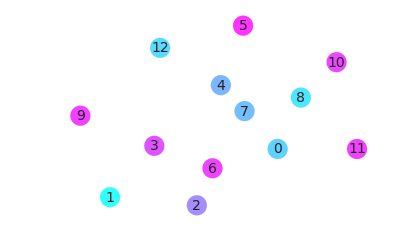

In [21]:
draw_network(G)


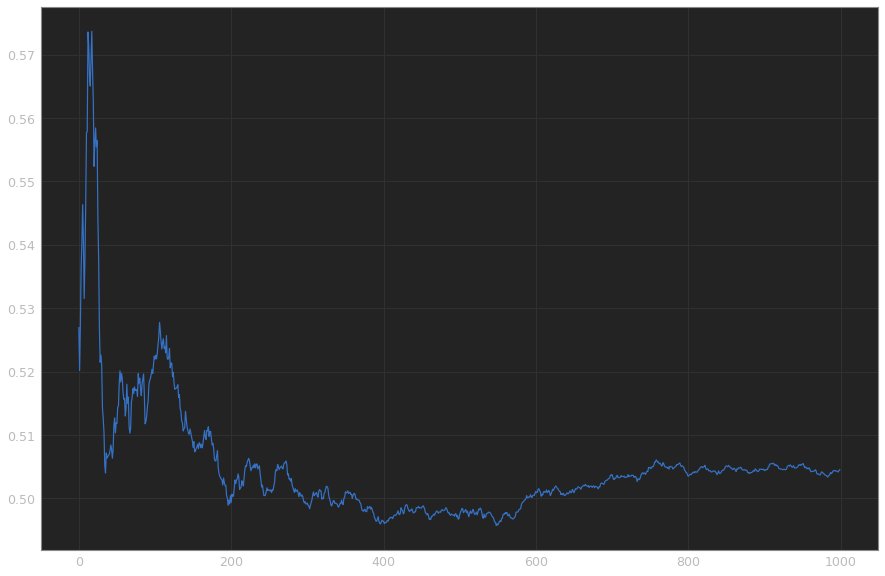

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
time = np.arange(1000)
plt.plot(time, avg_mode)
plt.show()


In [ ]:
# What do I need to save in each iteration?
# Summary statistics for the network on the whole
# Average Mode
# Variance
# Rate of Communication